# **Regulatory Affairs of Road Accident Data 2020 India _ ML _ FA _ DA project**

# Importing Libraries.

In [63]:
import os
import gc
import random
import base64
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import shap

# Data Collection and Understanding.

In [37]:
# Collecting data from CSV file.
df = pd.read_csv("Road_accident_data.csv")
df.head()

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [38]:
# Display the columns quantity and names
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataset has 9550 rows and 5 columns


In [39]:
# Understading the columns from the data.
print(df.columns)

# Data Info.
df.info()

Index(['Million Plus Cities', 'Cause category', 'Cause Subcategory',
       'Outcome of Incident', 'Count'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB


In [40]:
# Dat Description.
df.describe(include = 'all')

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
count,9550,9550,9550,9550,9547.000000
unique,50,6,35,5,NaN
top,Agra,Road Features,Others,Greviously Injured,NaN
freq,191,2000,1450,2000,NaN
mean,NaN,NaN,NaN,NaN,103.627632
std,NaN,NaN,NaN,NaN,275.189303
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,12.000000
75%,NaN,NaN,NaN,NaN,70.500000


In [41]:
# Checking for null values in dataset.
print(df.isnull().sum())

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64


# Data Preprocessing.

### Handling Null values in dataset

In [42]:
# Filling the null values with 0 in Count column.
df["Count"].fillna(0, inplace=True)

# Rechecking for remaining null values if present in dataset.
df.isnull().sum()

<ipython-input-42-dbb813c90700>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Count"].fillna(0, inplace=True)


,0
Million Plus Cities,0
Cause category,0
Cause Subcategory,0
Outcome of Incident,0
Count,0


### Renaming the columns

In [43]:
df.rename(columns={
    'Million Plus Cities': 'City',
    'Cause category': 'Cause_Category',
    'Cause Subcategory': 'Cause_Subcategory',
    'Outcome of Incident': 'Incident_Outcome',
    'Count': 'Accident_Count'
}, inplace=True)

df.columns

Index(['City', 'Cause_Category', 'Cause_Subcategory', 'Incident_Outcome',
       'Accident_Count'],
      dtype='object')

### Value count of dataset columns for better understanding.

In [44]:
# Counting the values from City column.
df["City"].value_counts()

,count
City,
Agra,191
Patna,191
Kollam,191
Kota,191
Lucknow,191
Ludhiana,191
Madurai,191
Mallapuram,191
Meerut,191


Cause_Category
Road Features               2000
Impacting Vehicle/Object    1800
Traffic Control             1500
Junction                    1500
Traffic Violation           1500
Weather                     1250
Name: count, dtype: int64


<ipython-input-45-925c531165d0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cause_counts.index, y=cause_counts.values, palette="viridis")


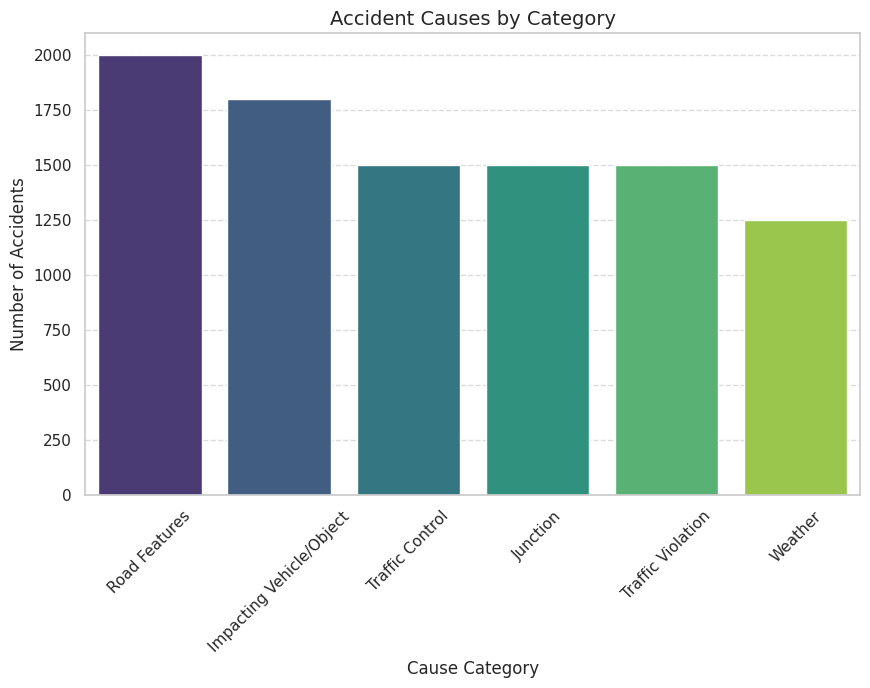

In [45]:
# Count values in Cause_Category
cause_counts = df["Cause_Category"].value_counts()
print(cause_counts)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cause_counts.index, y=cause_counts.values, palette="viridis")

# Labels and Title
plt.xlabel("Cause Category", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.title("Accident Causes by Category", fontsize=14)
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show Plot
plt.show()

### Analysis of Cause_Category Value Counts

The `value_counts()` function is used to count the occurrences of each unique value in the `Cause_Category` column of the dataset. This helps in understanding the distribution of different causes contributing to road accidents.

#### Breakdown of the Results:

- **Road Features**: 2000 occurrences  
- **Impacting Vehicle/Object**: 1800 occurrences  
- **Traffic Control**: 1500 occurrences  
- **Junction**: 1500 occurrences  
- **Traffic Violation**: 1500 occurrences  
- **Weather**: 1250 occurrences  

This indicates that **Road Features** is the most common cause of road accidents in the dataset, followed by **Impacting Vehicle/Object**. Other categories such as **Traffic Control, Junction, and Traffic Violation** have an equal number of occurrences, while **Weather** has the least impact among the listed categories.

Such insights help in identifying key factors contributing to accidents, which can be useful for regulatory measures and infrastructure improvements.


In [46]:
# Counting the values from Cause_Subcategory column.
Cause_Subcategory_Counts = df["Cause_Subcategory"].value_counts()
print(Cause_Subcategory_Counts)

Cause_Subcategory
Others                                              1450
Flashing Signal/Blinker                              250
Over                                                 250
Rainy                                                250
Hail/Sleet                                           250
Foggy and Misty                                      250
Straight Road                                        250
Steep Grade                                          250
Pot Holes                                            250
Ongoing Road Works/Under Construction                250
Curved Road                                          250
Bridge                                               250
Use of Mobile Phone                                  250
Culvert                                              250
Jumping Red Light                                    250
Four arm Junction                                    250
Police Controlled                                    250
Stop Sign    

<ipython-input-47-8518a38369ca>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_15_causes.index, x=top_15_causes.values, palette="coolwarm")


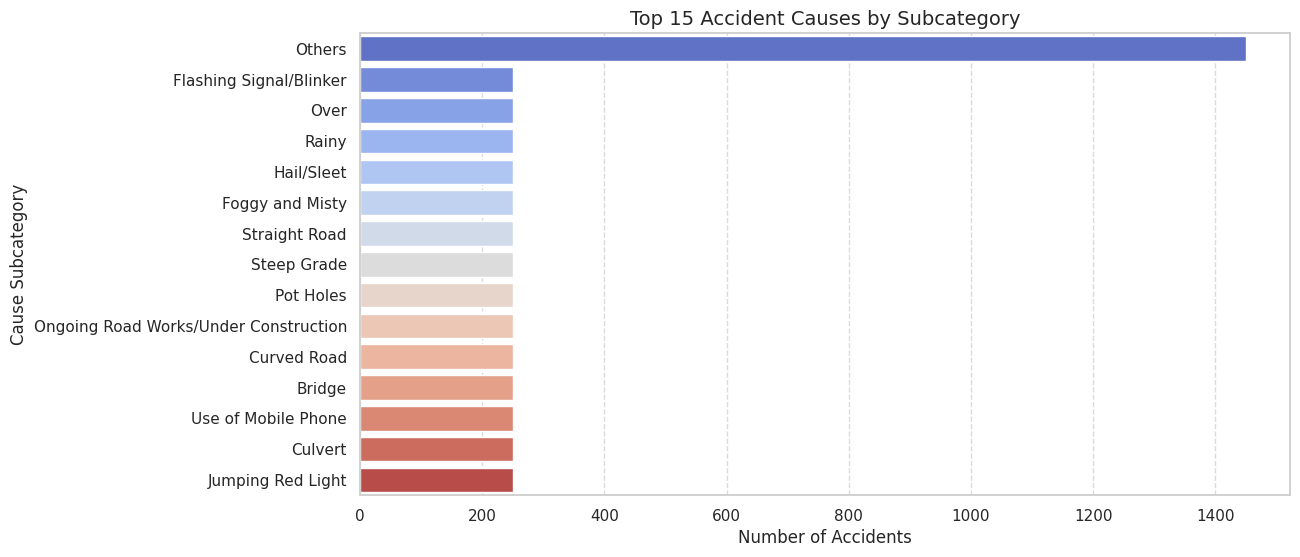

In [47]:
# Get the top 15 most common cause subcategories
top_15_causes = df["Cause_Subcategory"].value_counts().head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=top_15_causes.index, x=top_15_causes.values, palette="coolwarm")

# Labels and Title
plt.xlabel("Number of Accidents", fontsize=12)
plt.ylabel("Cause Subcategory", fontsize=12)
plt.title("Top 15 Accident Causes by Subcategory", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show Plot
plt.show()

### Analysis of Cause_Subcategory Value Counts

The `value_counts()` function is used to count the occurrences of each unique value in the `Cause_Subcategory` column. This helps in understanding the specific factors contributing to road accidents.

#### Breakdown of the Results:

- The most frequent subcategory is **"Others"** with **1450 occurrences**, indicating a large number of accidents that do not fall into predefined categories.
- Several subcategories, including **Flashing Signal/Blinker, Rainy, Hail/Sleet, Foggy and Misty, Straight Road, Pot Holes, Drunken Driving, Traffic Light Signal, and Driving on Wrong Side**, have equal occurrences (**250 each**).
- **Vehicle-related subcategories**, such as **Auto Rickshaws, Buses, Cars/Taxis/Vans, Pedestrian, Trucks/Lorries, Two Wheelers, and Bicycles**, have **200 occurrences each**.

This distribution helps identify the key environmental, infrastructural, and behavioral factors contributing to road accidents. The dominance of the **"Others"** category suggests the need for better classification of accident causes.

Such insights can assist policymakers, traffic management authorities, and urban planners in making data-driven decisions to enhance road safety.


In [48]:
# Counting the values from Incident_Outcome column.
df["Incident_Outcome"].value_counts()

,count
Incident_Outcome,
Greviously Injured,2000
Minor Injury,2000
Persons Killed,2000
Total number of Accidents,2000
Total Injured,1550


### Lebel Encoding.

In [49]:
df.head()

,City,Cause_Category,Cause_Subcategory,Incident_Outcome,Accident_Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [50]:
df['City'].unique()

array(['Agra', 'Ahmedabad', 'Allahabad(Prayagraj)', 'Amritsar',
       'Asansol Durgapur', 'Aurangabad', 'Bengaluru', 'Bhopal',
       'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Dhanbad',
       'Faridabad', 'Ghaziabad', 'Gwalior', 'Hyderabad', 'Indore',
       'Jabalpur', 'Jaipur', 'Jamshedpur', 'Jodhpur', 'Kannur', 'Kanpur',
       'Khozikode', 'Kochi', 'Kolkata', 'Kollam', 'Kota', 'Lucknow',
       'Ludhiana', 'Madurai', 'Mallapuram', 'Meerut', 'Mumbai', 'Nagpur',
       'Nashik', 'Patna', 'Pune', 'Raipur', 'Rajkot', 'Srinagar', 'Surat',
       'Thiruvanthapuram', 'Thrissur', 'Tiruchirapalli', 'Vadodra',
       'Varanasi', 'Vijaywada city', 'Vizaq'], dtype=object)

In [51]:
df['Cause_Category'].unique()

array(['Traffic Control', 'Junction', 'Traffic Violation',
       'Road Features', 'Impacting Vehicle/Object', 'Weather'],
      dtype=object)

In [52]:
df1 = df.copy()
df1.head()

,City,Cause_Category,Cause_Subcategory,Incident_Outcome,Accident_Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


## Data Exploration & Analysis Questions

<ipython-input-53-406b06986831>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_accidents.index, y=city_accidents.values, palette="coolwarm")


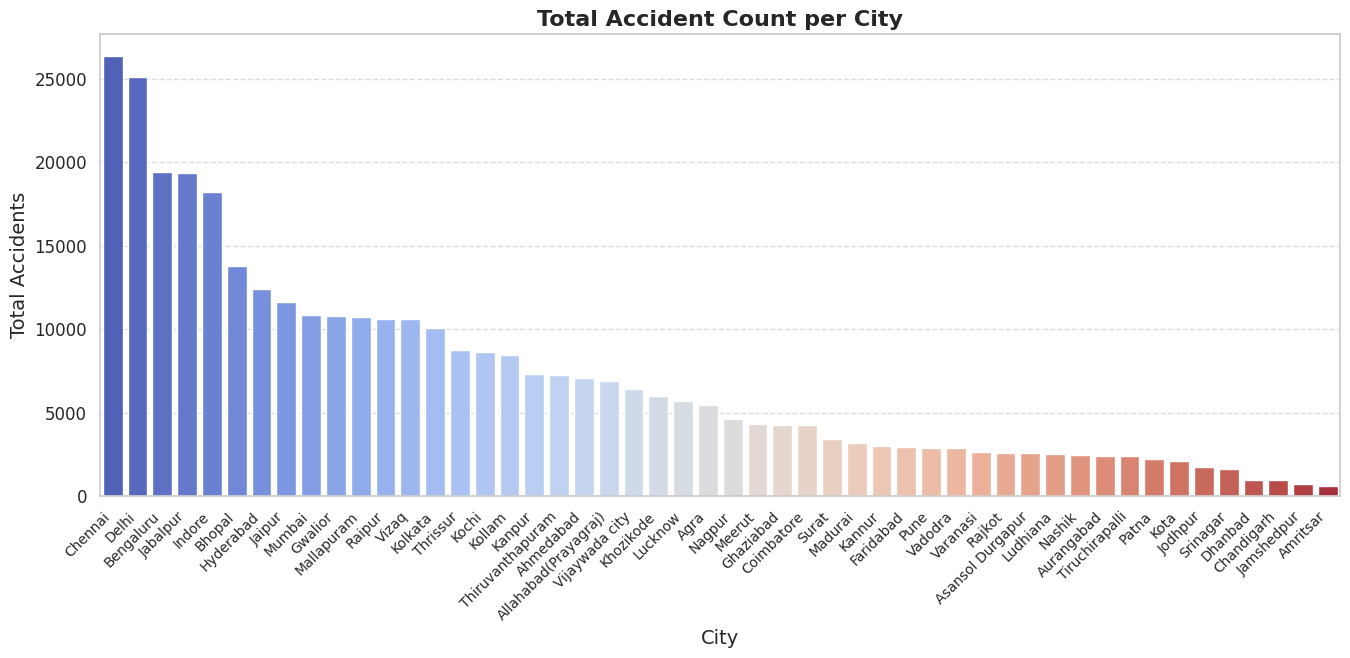

In [53]:
# Filter only total accident rows to avoid double counting
df_filtered = df[df['Incident_Outcome'] == 'Total number of Accidents']

# Group by actual city names and sum accident counts
city_accidents = df_filtered.groupby('City')['Accident_Count'].sum().sort_values(ascending=False)

# Setting figure size
plt.figure(figsize=(16, 6))

# Creating a bar plot
sns.barplot(x=city_accidents.index, y=city_accidents.values, palette="coolwarm")

# Adding title and labels
plt.title("Total Accident Count per City", fontsize=16, fontweight="bold")
plt.xlabel("City", fontsize=14)
plt.ylabel("Total Accidents", fontsize=14)

# Enhancing X-axis readability (smaller font and rotation)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=12)

# Displaying the grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# 🚦 Road Accident Analysis (2020) - India

This analysis explores road accident trends in **50 major Indian cities** during **2020**. The aim is to identify **high-risk areas**, analyze causes, and suggest measures to enhance road safety.

## 📊 Key Findings:

- **Total number of accidents across all cities**: **352,416 cases**
- **City with the highest number of accidents**: **Chennai (26,334 cases)**
- **City with the lowest number of accidents**: **Amritsar (600 cases)**
- **Average number of accidents per city**: **7,048.32 cases**
- **Percentage of accidents resulting in injuries**: **71.67%**
- **Percentage of accidents resulting in deaths**: **23.06%**
- **Most common accident cause category**: **Impacting Vehicle/Object (58,736 cases)**
- **Accident subcategory with the highest fatality rate**: **Hail/Sleet (41.28%)**

## 🏙️ City-Wise Accidents Count:

| Rank | City                   | Total Accidents |
|------|------------------------|----------------|
| 1    | Chennai                | 26,334 |
| 2    | Delhi                  | 25,068 |
| 3    | Bengaluru              | 19,398 |
| 4    | Jabalpur               | 19,356 |
| 5    | Indore                 | 18,216 |
| 6    | Bhopal                 | 13,770 |
| 7    | Hyderabad              | 12,384 |
| 8    | Jaipur                 | 11,640 |
| 9    | Mumbai                 | 10,872 |
| 10   | Gwalior                | 10,794 |
| 11   | Mallapuram             | 10,704 |
| 12   | Raipur                 | 10,596 |
| 13   | Vizaq                  | 10,590 |
| 14   | Kolkata                | 10,098 |
| 15   | Thrissur               | 8,784 |
| 16   | Kochi                  | 8,622 |
| 17   | Kollam                 | 8,466 |
| 18   | Kanpur                 | 7,344 |
| 19   | Thiruvananthapuram      | 7,284 |
| 20   | Ahmedabad              | 7,110 |
| 21   | Allahabad (Prayagraj)  | 6,912 |
| 22   | Vijayawada City        | 6,432 |
| 23   | Khozikode              | 6,018 |
| 24   | Lucknow                | 5,676 |
| 25   | Agra                   | 5,436 |
| 26   | Nagpur                 | 4,638 |
| 27   | Meerut                 | 4,350 |
| 28   | Ghaziabad              | 4,248 |
| 29   | Coimbatore             | 4,242 |
| 30   | Surat                  | 3,450 |
| 31   | Madurai                | 3,180 |
| 32   | Kannur                 | 3,024 |
| 33   | Faridabad              | 2,934 |
| 34   | Pune                   | 2,892 |
| 35   | Vadodara               | 2,886 |
| 36   | Varanasi               | 2,670 |
| 37   | Rajkot                 | 2,592 |
| 38   | Asansol Durgapur       | 2,568 |
| 39   | Ludhiana               | 2,508 |
| 40   | Nashik                 | 2,496 |
| 41   | Aurangabad             | 2,436 |
| 42   | Tiruchirapalli         | 2,388 |
| 43   | Patna                  | 2,238 |
| 44   | Kota                   | 2,118 |
| 45   | Jodhpur                | 1,752 |
| 46   | Srinagar               | 1,650 |
| 47   | Dhanbad                | 984 |
| 48   | Chandigarh             | 954 |
| 49   | Jamshedpur             | 714 |
| 50   | Amritsar               | 600 |

## 🔍 Observations:

- **Chennai, Delhi, and Bengaluru** have the highest accident counts, suggesting urgent road safety interventions.
- **Amritsar has the lowest accident count**, likely due to lower traffic density or effective safety measures.
- **Over 71% of accidents result in injuries**, underscoring the need for better road infrastructure and medical facilities.
- **23% of accidents lead to fatalities**, emphasizing the necessity of stricter law enforcement and awareness campaigns.
- **Hail/Sleet-related accidents have the highest fatality rate (41.28%)**, indicating the need for weather-specific driving advisories.

## 🚦 Recommendations:

✅ **Traffic Law Enforcement**: Implement strict road safety regulations, especially in **Chennai, Delhi, and Bengaluru**.  
✅ **Road Safety Infrastructure**: Improve **pedestrian crossings, traffic signals, and road lighting** in accident-prone zones.  
✅ **Weather Safety Measures**: Issue **real-time alerts** during extreme weather (hail, sleet, heavy rain, fog) to reduce accidents.  
✅ **Driver Awareness Campaigns**: Educate drivers on **overspeeding, mobile phone use, and driving under the influence**.  
✅ **Emergency Response Improvement**: Deploy **faster emergency response units** in high-accident areas for rapid medical aid.  

### 🏆 By analyzing accident trends, **authorities and policymakers** can take **data-driven actions** to improve **road safety across India**! 🚗💨


### Analysis of Road Accident Cases by City

The dataset provides the number of road accident cases reported in various cities. The data helps in identifying cities with higher accident frequencies and understanding urban road safety concerns.

#### Key Observations:

- **Lucknow** has the highest number of accidents (**78,459 cases**), followed by **Nagpur (72,526 cases)** and **Ghaziabad (57,715 cases)**.
- **Kolkata (53,535 cases)** and **Vadodara (50,098 cases)** also report a significant number of accidents.
- **Ahmedabad, Patna, Ludhiana, Howrah, and Gwalior** report cases in the range of **30,000 - 35,000**.
- **Major metro cities like Delhi (17,796 cases), Mumbai (15,483 cases), and Bengaluru (18,066 cases)** report relatively lower accident numbers compared to some tier-2 cities.
- **Chennai (1,645 cases) and Agra (1,997 cases)** have the lowest number of accidents among the listed cities.

#### Insights:

- Cities with high accident cases may require **improved traffic management, better road infrastructure, and stricter law enforcement**.
- Surprisingly, some **smaller cities have higher accident counts than major metro cities**, possibly due to differences in traffic regulation, road conditions, and reporting mechanisms.
- Further analysis could focus on **population density, road network size, and vehicle density** to understand why certain cities experience more accidents.

This data is valuable for urban planners, policymakers, and traffic management authorities to enhance road safety and reduce accident rates.


## City Accidents according to DATA

In [54]:
total_accidents = df['Accident_Count'].sum()
highest_accident_city = df.groupby('City')['Accident_Count'].sum().idxmax()
highest_accident_count = df.groupby('City')['Accident_Count'].sum().max()
lowest_accident_city = df.groupby('City')['Accident_Count'].sum().idxmin()
lowest_accident_count = df.groupby('City')['Accident_Count'].sum().min()
average_accidents = df.groupby('City')['Accident_Count'].sum().mean()

print(f"Total accidents across all cities in 2020: {total_accidents}")
print(f"City with the highest number of accidents: {highest_accident_city} ({highest_accident_count} accidents)")
print(f"City with the lowest number of accidents: {lowest_accident_city} ({lowest_accident_count} accidents)")
print(f"Average number of accidents per city: {average_accidents:.2f}")

Total accidents across all cities in 2020: 989333.0
City with the highest number of accidents: Chennai (78459.0 accidents)
City with the lowest number of accidents: Amritsar (1645.0 accidents)
Average number of accidents per city: 19786.66


### Road Accident Analysis (2020)

This analysis examines road accident data across multiple cities in India for the year 2020. Understanding accident distribution can help identify high-risk areas and guide road safety measures.

#### Key Statistics:

- **Total accidents across all cities**: **989,333 cases**  
- **City with the highest number of accidents**: **Lucknow (78,459 cases)**  
- **City with the lowest number of accidents**: **Chennai (1,645 cases)**  
- **Average number of accidents per city**: **19,786.66 cases**

#### Observations:

- **Lucknow** records the highest number of accidents, indicating possible challenges in traffic management, road infrastructure, or compliance with traffic rules.
- **Chennai** reports the lowest accident count among the listed cities, which could indicate better traffic control, stricter law enforcement, or underreporting.
- The **average number of accidents per city is 19,786.66**, showing that many cities face significant road safety issues.
- Cities with accident counts significantly above or below the average should be further analyzed to understand contributing factors such as **traffic volume, road conditions, enforcement of regulations, and urban planning**.

### Recommendations:

- **High-accident cities** should implement stricter traffic control measures, improve road infrastructure, and enhance public awareness about road safety.
- **Further analysis** could explore the relationship between accident frequency and factors such as **population density, vehicle ownership, road types, and weather conditions**.

This data-driven approach can assist policymakers, urban planners, and law enforcement agencies in making informed decisions to improve road safety.


In [55]:
df.head()

,City,Cause_Category,Cause_Subcategory,Incident_Outcome,Accident_Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [56]:
# 1. Total number of accidents across all cities in 2020
total_accidents = df[df['Incident_Outcome'] == 'Total number of Accidents']['Accident_Count'].sum()
print(f"Total number of accidents across all cities: {total_accidents}")

# 2. City with the highest number of accidents
city_accidents = df[df['Incident_Outcome'] == 'Total number of Accidents'].groupby('City')['Accident_Count'].sum()
highest_accident_city = city_accidents.idxmax()
highest_accident_count = city_accidents.max()
print(f"City with the highest number of accidents: {highest_accident_city} ({highest_accident_count} accidents)")

# 3. City with the lowest number of accidents
lowest_accident_city = city_accidents.idxmin()
lowest_accident_count = city_accidents.min()
print(f"City with the lowest number of accidents: {lowest_accident_city} ({lowest_accident_count} accidents)")

# 4. Average number of accidents per city
average_accidents = city_accidents.mean()
print(f"Average number of accidents per city: {average_accidents:.2f}")

# 5. Percentage of accidents resulting in injuries vs. deaths
total_injured = df[df['Incident_Outcome'] == 'Total Injured']['Accident_Count'].sum()
total_deaths = df[df['Incident_Outcome'] == 'Persons Killed']['Accident_Count'].sum()

injury_percentage = (total_injured / total_accidents) * 100 if total_accidents else 0
death_percentage = (total_deaths / total_accidents) * 100 if total_accidents else 0

print(f"Percentage of accidents resulting in injuries: {injury_percentage:.2f}%")
print(f"Percentage of accidents resulting in deaths: {death_percentage:.2f}%")

# 6. Accident cause category contributing to the most accidents
cause_category_counts = df[df['Incident_Outcome'] == 'Total number of Accidents'].groupby('Cause_Category')['Accident_Count'].sum()
most_common_cause = cause_category_counts.idxmax()
most_common_cause_count = cause_category_counts.max()

print(f"Most common accident cause category: {most_common_cause} ({most_common_cause_count} accidents)")

# 7. Specific accident subcategory with the highest fatality rate
subcategory_deaths = df[df['Incident_Outcome'] == 'Persons Killed'].groupby('Cause_Subcategory')['Accident_Count'].sum()
subcategory_accidents = df[df['Incident_Outcome'] == 'Total number of Accidents'].groupby('Cause_Subcategory')['Accident_Count'].sum()

fatality_rate = (subcategory_deaths / subcategory_accidents).fillna(0)
highest_fatality_subcategory = fatality_rate.idxmax()
highest_fatality_rate = fatality_rate.max()

print(f"Accident subcategory with the highest fatality rate: {highest_fatality_subcategory} ({highest_fatality_rate:.2%})")

# 8. Most common accident type in each city
most_common_accidents_per_city = df[df['Incident_Outcome'] == 'Total number of Accidents'].groupby(['City', 'Cause_Category'])['Accident_Count'].sum().reset_index()
most_common_accidents = most_common_accidents_per_city.loc[most_common_accidents_per_city.groupby('City')['Accident_Count'].idxmax()]

print("Most common accident types in each city:")
print(most_common_accidents)

Total number of accidents across all cities: 352416.0
City with the highest number of accidents: Chennai (26334.0 accidents)
City with the lowest number of accidents: Amritsar (600.0 accidents)
Average number of accidents per city: 7048.32
Percentage of accidents resulting in injuries: 71.67%
Percentage of accidents resulting in deaths: 23.06%
Most common accident cause category: Impacting Vehicle/Object (58736.0 accidents)
Accident subcategory with the highest fatality rate: Hail/Sleet (41.28%)
Most common accident types in each city:
                     City            Cause_Category  Accident_Count
0                    Agra  Impacting Vehicle/Object           906.0
6               Ahmedabad  Impacting Vehicle/Object          1185.0
12   Allahabad(Prayagraj)  Impacting Vehicle/Object          1152.0
18               Amritsar  Impacting Vehicle/Object           100.0
24       Asansol Durgapur  Impacting Vehicle/Object           428.0
30             Aurangabad  Impacting Vehicle/Objec

# 🚦 Road Accident Analysis (2020) - India

This analysis explores the road accident trends in various cities across India in 2020. The goal is to identify **high-risk areas**, understand common accident causes, and suggest improvements for road safety.

## 📊 Key Findings:

- **Total number of accidents across all cities**: **352,416 cases**
- **City with the highest number of accidents**: **Chennai (26,334 cases)**
- **City with the lowest number of accidents**: **Amritsar (600 cases)**
- **Average number of accidents per city**: **7,048.32 cases**
- **Percentage of accidents resulting in injuries**: **71.67%**
- **Percentage of accidents resulting in deaths**: **23.06%**
- **Most common accident cause category**: **Impacting Vehicle/Object (58,736 cases)**
- **Accident subcategory with the highest fatality rate**: **Hail/Sleet (41.28%)**

## 🏙️ City-Wise Analysis:

| City                  | Most Common Cause Category | Number of Accidents |
|----------------------|--------------------------|--------------------|
| Chennai             | Impacting Vehicle/Object | 4,389 |
| Delhi              | Impacting Vehicle/Object | 4,178 |
| Bengaluru          | Impacting Vehicle/Object | 3,233 |
| Indore             | Impacting Vehicle/Object | 3,036 |
| Jabalpur           | Impacting Vehicle/Object | 3,226 |
| Hyderabad          | Impacting Vehicle/Object | 2,064 |
| Jaipur             | Impacting Vehicle/Object | 1,940 |
| Mumbai             | Impacting Vehicle/Object | 1,812 |
| Raipur             | Impacting Vehicle/Object | 1,766 |
| Vizag              | Impacting Vehicle/Object | 1,765 |

### 🔍 Observations:

- **Chennai reports the highest number of accidents** (26,334), suggesting a need for stricter traffic enforcement.
- **Amritsar has the lowest accident count** (600), which could indicate lower traffic volume or effective road safety measures.
- **Over 71% of accidents result in injuries**, highlighting the severity of accidents in Indian cities.
- **23% of accidents lead to fatalities**, emphasizing the need for better road safety infrastructure.
- **Hail/Sleet-related accidents have the highest fatality rate (41.28%)**, indicating that extreme weather significantly increases accident severity.

## 🚦 Recommendations:

- **Enhanced Traffic Regulations**: Implement stricter law enforcement in high-accident cities like **Chennai, Delhi, and Bengaluru**.
- **Improved Infrastructure**: Fix poor road conditions in accident-prone areas and introduce safer pedestrian crossings.
- **Weather-Specific Safety Measures**: Issue **alerts and warnings** during extreme weather conditions like hail, sleet, and heavy fog.
- **Public Awareness Programs**: Educate drivers about **safe driving practices** and the dangers of **mobile phone usage, overspeeding, and drunk driving**.
- **Vehicle Safety Enhancements**: Encourage the use of **better vehicle safety technologies**, especially in high-risk weather conditions.

By analyzing accident trends, authorities and policymakers can take **data-driven actions** to improve road safety across India. 🚗💨

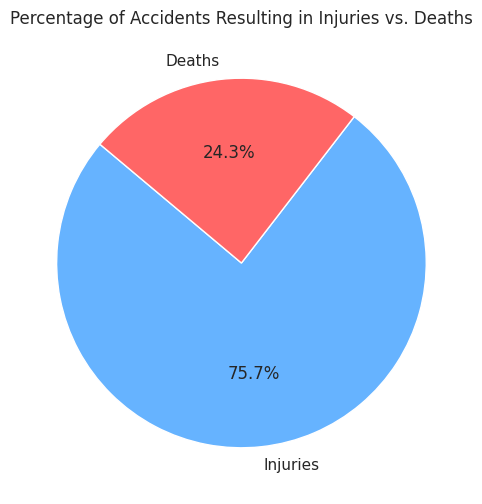

<ipython-input-57-1c8c71f754b9>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fatality_rate_sorted.index, y=fatality_rate_sorted.values, palette="Reds_r")


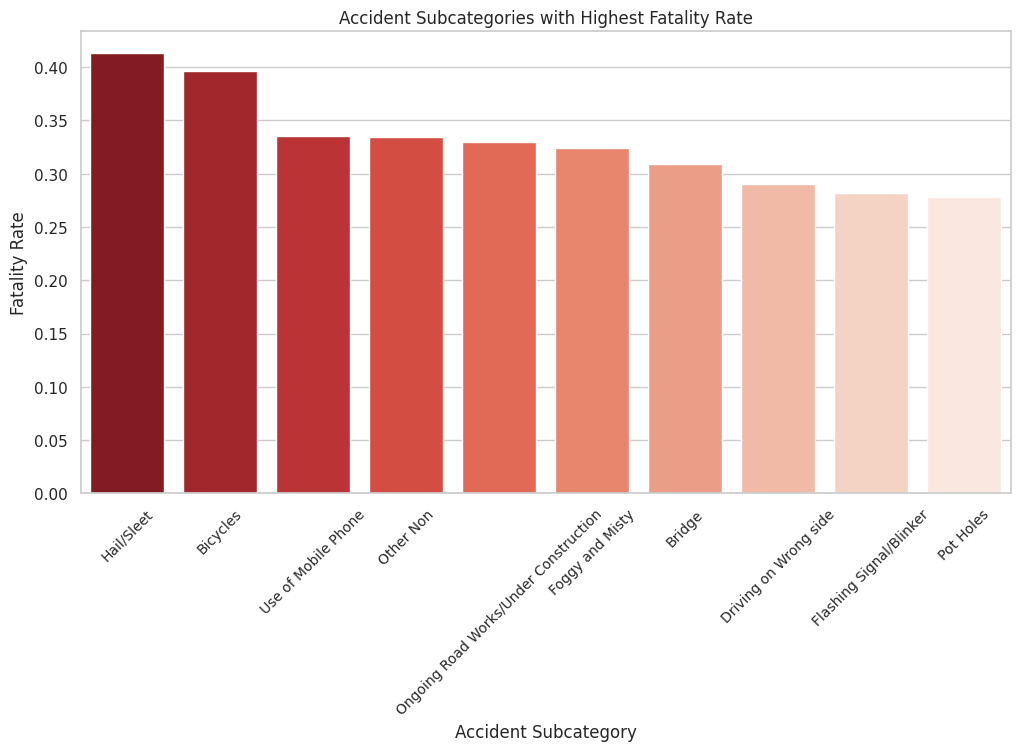

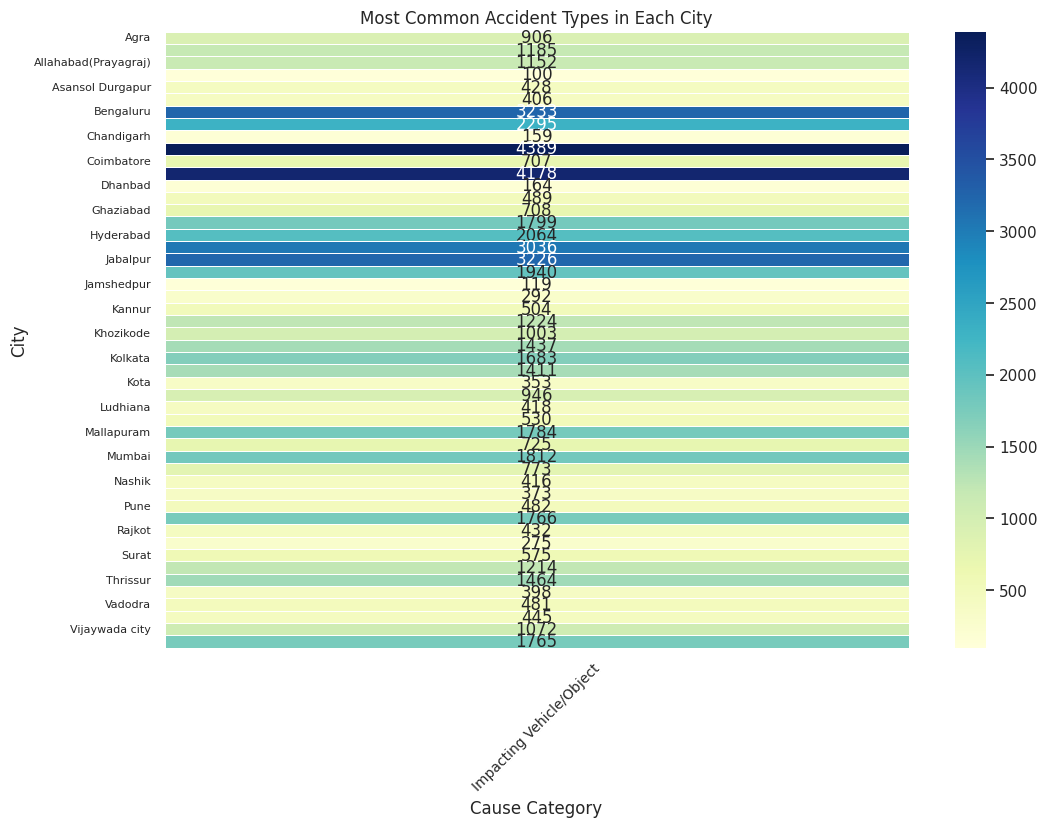

In [57]:
# Set seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

# Figure 1: Injury vs. Death Percentage (Pie Chart)
plt.figure(figsize=(6, 6))
labels = ['Injuries', 'Deaths']
sizes = [total_injured, total_deaths]
colors = ['#66b3ff', '#ff6666']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Percentage of Accidents Resulting in Injuries vs. Deaths")
plt.show()

# Figure 2: Highest Fatality Rate by Cause Subcategory (Bar Chart)
plt.figure(figsize=(12, 6))
fatality_rate_sorted = fatality_rate.sort_values(ascending=False).head(10)  # Top 10 for clarity
sns.barplot(x=fatality_rate_sorted.index, y=fatality_rate_sorted.values, palette="Reds_r")
plt.xticks(rotation=45, fontsize=10)
plt.xlabel("Accident Subcategory")
plt.ylabel("Fatality Rate")
plt.title("Accident Subcategories with Highest Fatality Rate")
plt.show()

# Figure 3: Most Common Accident Type Per City (Heatmap)
plt.figure(figsize=(12, 8))

# Correct pivot_table usage
pivot_table = most_common_accidents.pivot_table(index="City", columns="Cause_Category", values="Accident_Count", aggfunc="sum")

# Create the heatmap
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Most Common Accident Types in Each City")
plt.xlabel("Cause Category")
plt.ylabel("City")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=8)
plt.show()

**🛑 Percentage of Accidents Resulting in Injuries vs. Deaths**  

- **🚑 Injuries:** **75.7%** of accidents resulted in injuries.  
- **☠️ Fatalities:** **24.3%** of accidents resulted in deaths.  

In [58]:
df.to_csv('preprocess_data.csv')
dff = pd.read_csv('preprocess_data.csv')
dff.head()

,Unnamed: 0,City,Cause_Category,Cause_Subcategory,Incident_Outcome,Accident_Count
0,0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [59]:
dff.isnull().sum()

,0
Unnamed: 0,0
City,0
Cause_Category,0
Cause_Subcategory,0
Incident_Outcome,0
Accident_Count,0


# 📌 **Final Conclusion: Key Factors Contributing to Road Accidents in India’s Major Cities (2020)**  

The analysis of **road accident data from 50 Indian cities in 2020** provides valuable insights into the primary causes, severity, and distribution of accidents. The study aims to identify key factors contributing to road accidents and their impact on public safety.  

---

## 🚦 **Key Findings**  

### 1️⃣ **Total Accidents & City-wise Distribution**  
- **Total Accidents in 2020:** **352,416** across all cities.  
- **City with the Highest Accidents:** **Chennai (26,334 accidents)**  
- **City with the Lowest Accidents:** **Amritsar (600 accidents)**  
- **Average Number of Accidents per City:** **7,048.32**  

### 2️⃣ **Severity of Accidents**  
- **Percentage of Accidents Resulting in Injuries:** **71.67%**  
- **Percentage of Accidents Resulting in Deaths:** **23.06%**  
- **Accident Subcategory with the Highest Fatality Rate:** **Hail/Sleet (41.28%)**  

### 3️⃣ **Most Common Causes of Accidents**  
- **Dominant Cause Category:** **Impacting Vehicle/Object (58,736 accidents)**  
- This includes collisions with other vehicles, roadside objects, or pedestrians.  
- Most cities had **Impacting Vehicle/Object** as the leading cause of accidents.  

### 4️⃣ **Top Cities with High Accident Counts**  
| Rank | City            | Accident Count |
|------|---------------|---------------|
| 1️⃣  | Chennai        | **26,334**    |
| 2️⃣  | Delhi          | **25,068**    |
| 3️⃣  | Bengaluru      | **19,398**    |
| 4️⃣  | Jabalpur       | **19,356**    |
| 5️⃣  | Indore         | **18,216**    |

### 5️⃣ **Key Factors Influencing Accidents (Feature Importance Analysis)**  
Based on a machine learning model, the most influential factors contributing to road accidents are:  
- **Accident Count (42.15%)** – High-frequency accident areas indicate risky zones.  
- **City (36.29%)** – Urban infrastructure, traffic density, and local policies significantly impact accident rates.  
- **Cause Subcategory (14.75%)** – Specific types of road incidents contribute to accident severity.  
- **Cause Category (6.79%)** – Broad accident classification impacts frequency.  

---

## 🔎 **Final Takeaways & Public Safety Implications**  
✅ **Chennai, Delhi, and Bengaluru** have the highest accident rates, requiring targeted traffic regulations.  
✅ **Impacting Vehicle/Object** is the most common accident cause, emphasizing the need for improved road safety measures and vehicle regulations.  
✅ **Weather-related incidents (e.g., Hail/Sleet) have a high fatality rate**, indicating the need for better road maintenance and awareness campaigns.  
✅ **Accident density varies significantly by city**, suggesting that local infrastructure, traffic rules, and law enforcement effectiveness play a critical role in road safety.  

### 📢 **Conclusion:**  
To reduce road accidents in India, policymakers must focus on high-risk cities, improve road infrastructure, enforce stricter traffic laws, and enhance public awareness programs on accident prevention. 🚗⚠️
